## 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup as bs
import pandas as pd

In [5]:
from urllib.request import urlopen

url_base = 'https://movie.naver.com/'
url_syb = 'movie/sdb/rank/rmovie.nhn?sel=cur&amp;date;=201805027'

page = urlopen(url_base + url_syb)

soup = bs(page, 'html.parser')
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;amp;date;=201805027" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<met

In [6]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=157243" title="당갈">당갈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=106360" title="위대한 쇼맨">위대한 쇼맨</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=144379" title="러빙 빈센트">러빙 빈센트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154226" title="피터 래빗">피터 래빗</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=27219" title="박하사탕">박하사탕</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=151254" title="비밥바룰라">비밥바룰라</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=173653" title="그날, 바다">그날, 바다</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136315" title="어벤져스: 인피니티 워">어벤져스: 인피니티 워</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159311" title="소공녀">소

In [7]:
soup.find_all('div', 'tit5')[0].a.string

'당갈'

In [8]:
soup.find_all('td', 'point')[0].string

'9.64'

In [14]:
date = pd.date_range('2018-2-17', periods=100, freq='D')
date

DatetimeIndex(['2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24',
               '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28',
               '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
               '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
               '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
               '2018-03-29', '2018-03-30', '2018-03-31', '2018-04-01',
               '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09',
               '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13',
      

In [16]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
            "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = bs(response, 'html.parser')
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

변수 html을 지정할 때 중괄호 `{}`로 date라고 잡은 것은 그 밑에 response라는 변수에서 `{date}`를 변수로 취급하여 내용을 바꿈.

In [18]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2018-02-17,원더,9.40
1,2018-02-17,위대한 쇼맨,9.39
2,2018-02-17,굿 윌 헌팅,9.33
3,2018-02-17,타이타닉,9.29
4,2018-02-17,1987,9.26


읽은 내용을 pandas로 저장.  
이 내용에는 날짜별로 영화와 포인트가 저장되어 있음.  
날짜가 아니라 영화별로 점수의 합산을 데이터로 보려면 `pivot_table`을 사용하면 됨.

In [20]:
import numpy as np

movie['point'] = movie['point'].astype(float)
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
위대한 쇼맨,938.14
셰이프 오브 워터: 사랑의 모양,788.77
비밥바룰라,788.03
러빙 빈센트,753.76
원더,714.38


`aggfunc`으로 `np.sum`을 이용해서 합산을 해야 영화별 점수의 합계로 정렬됨.

In [25]:
tmp = movie.query('name == ["어벤져스: 인피니티 워"]')
tmp

,date,name,point
3130,2018-04-25,어벤져스: 인피니티 워,9.17
3177,2018-04-26,어벤져스: 인피니티 워,9.18
3227,2018-04-27,어벤져스: 인피니티 워,9.16
3277,2018-04-28,어벤져스: 인피니티 워,9.11
3329,2018-04-29,어벤져스: 인피니티 워,9.07
3380,2018-04-30,어벤져스: 인피니티 워,9.05
3429,2018-05-01,어벤져스: 인피니티 워,9.03
3479,2018-05-02,어벤져스: 인피니티 워,9.02
3530,2018-05-03,어벤져스: 인피니티 워,9.02
3580,2018-05-04,어벤져스: 인피니티 워,9.02


위 코드로 특정 영화만 추려서 확인이 가능하다.

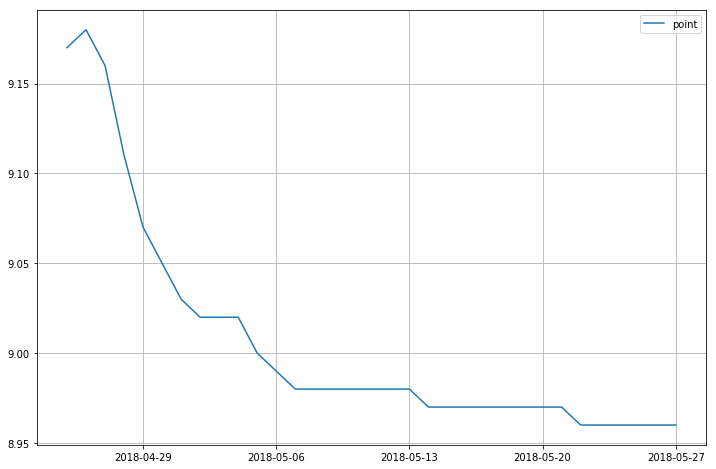

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

날짜별 평점의 변화를 확인 가능.  
그래프로 출력

## 영화별 날짜 변화에 따른 평점 변화 확인하기

In [28]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                                             \
name       12 솔져스 120BPM  1987  1급기밀  4등 50가지 그림자: 해방 7년의 밤 B급 며느리   강철비 게이트   
date                                                                           
2018-02-17   8.83    NaN  9.26  8.77 NaN          NaN   NaN   8.52   NaN NaN   
2018-02-18   8.83    NaN  9.26  8.79 NaN          NaN   NaN   8.53   NaN NaN   
2018-02-19   8.84    NaN  9.26  8.81 NaN          NaN   NaN   8.56  8.38 NaN   
2018-02-20   8.84    NaN  9.26  8.83 NaN          NaN   NaN   8.56  8.38 NaN   
2018-02-21   8.84    NaN  9.26  8.82 NaN          NaN   NaN   8.54  8.38 NaN   

                ...                                                 \
name            ...       플로리다 프로젝트  플립 피터 래빗 하이 스피드! –프리! 스타팅 데이즈   
date            ...                                                  
2018-02-17      ...             NaN NaN   NaN                  NaN   
2018-02-18      ...             NaN NaN   NaN                  NaN   
2018-02-19      ...             NaN NaN   NaN                  NaN   
2018-02-20      ...             NaN NaN   NaN                  NaN   
2018-02-21      ...             NaN NaN   NaN                  NaN   

                                                                    
name       한 솔로: 스타워즈 스토리 허리케인 하이스트 현기증 환상의 빛    흥부 흥부 글로 세상을 바꾼 자  
date                                                                
2018-02-17            NaN       NaN NaN   NaN  5.69            NaN  
2018-02-18            NaN       NaN NaN   NaN  5.52            NaN  
2018-02-19            NaN       NaN NaN   NaN  5.45            NaN  
2018-02-20            NaN       NaN NaN   NaN  5.40            NaN  
2018-02-21            NaN       NaN NaN   NaN  5.39            NaN  

[5 rows x 193 columns]

In [29]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [30]:
movie_pivot.head()

name,12 솔져스,120BPM,1987,1급기밀,4등,50가지 그림자: 해방,7년의 밤,B급 며느리,강철비,게이트,...,플로리다 프로젝트,플립,피터 래빗,하이 스피드! –프리! 스타팅 데이즈,한 솔로: 스타워즈 스토리,허리케인 하이스트,현기증,환상의 빛,흥부,흥부 글로 세상을 바꾼 자
date,,,,,,,,,,,,,,,,,,,,,
2018-02-17,8.83,NaN,9.26,8.77,NaN,NaN,NaN,8.52,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.69,NaN
2018-02-18,8.83,NaN,9.26,8.79,NaN,NaN,NaN,8.53,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.52,NaN
2018-02-19,8.84,NaN,9.26,8.81,NaN,NaN,NaN,8.56,8.38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN
2018-02-20,8.84,NaN,9.26,8.83,NaN,NaN,NaN,8.56,8.38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,NaN
2018-02-21,8.84,NaN,9.26,8.82,NaN,NaN,NaN,8.54,8.38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.39,NaN


In [31]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='Applegothic')
else:
    print('Unknow system..')

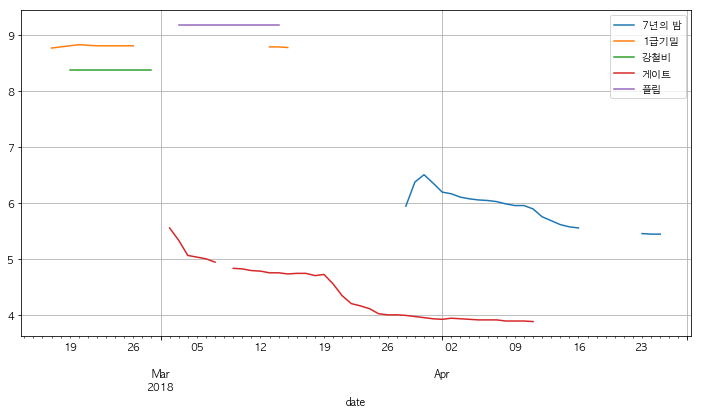

In [35]:
movie_pivot.plot(y=['7년의 밤', '1급기밀', '강철비', '게이트', '플립'], figsize=(12, 6))
plt.legend(loc='best')
plt.grid()
plt.show()

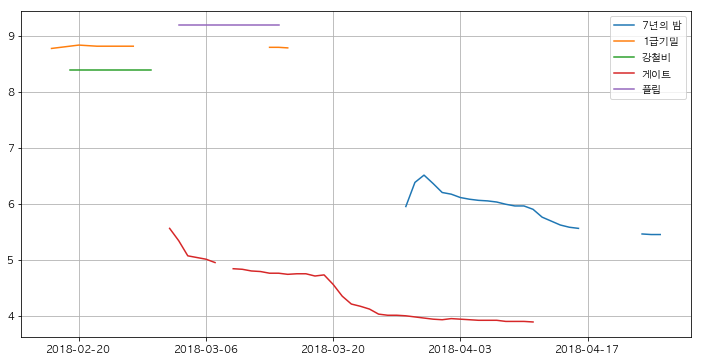

In [38]:
# 이렇게 코딩하는 것을 추천(보기 편함)
target_col = ['7년의 밤', '1급기밀', '강철비', '게이트', '플립']
plt.figure(figsize=(12, 6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()